# Analyzing Udemy Courses Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('udemy_courses.csv',parse_dates=['published_timestamp'])
df

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14 17:36:46+00:00,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10 22:24:30+00:00,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30 16:41:42+00:00,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11 19:06:15+00:00,Web Development


#  Getting Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


# Check Null Values In The Dataset

In [10]:
df.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

<Axes: >

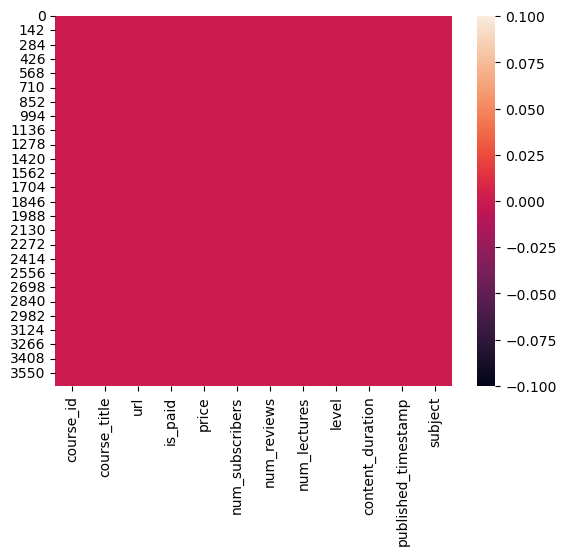

In [11]:
sns.heatmap(df.isnull())

# Check For Duplicate Data and Drop Them

In [16]:
df.duplicated().any()

True

In [17]:
df = df.drop_duplicates()

In [18]:
df.duplicated().any()

False

# Find Out Number of Courses Per Subjects

In [26]:
df['subject'].value_counts()

Web Development        1199
Business Finance       1191
Musical Instruments     680
Graphic Design          602
Name: subject, dtype: int64

<BarContainer object of 4 artists>

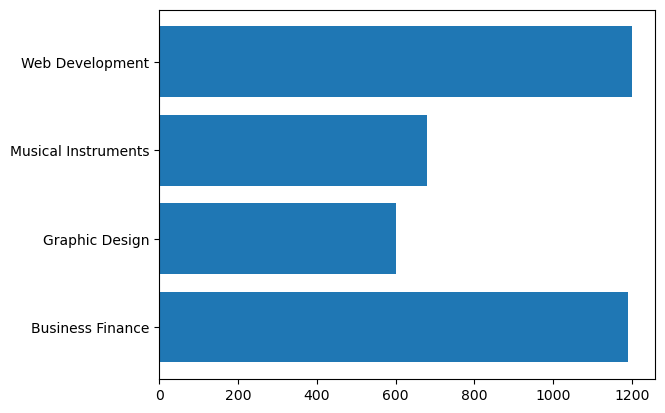

In [38]:
x = ['Business Finance','Graphic Design','Musical Instruments','Web Development']
y = [1191,602,680,1199]
plt.barh(x,y)

#  For Which Levels, Udemy Courses Providing The Courses

In [43]:
df['level'].value_counts()

All Levels            1925
Beginner Level        1268
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64

# Display The Count of Paid and Free Courses 

In [50]:
df['is_paid'].value_counts()

True     3362
False     310
Name: is_paid, dtype: int64

In [52]:
print(f"no of paid courses are {df['is_paid'].value_counts()[0]} and free are {df['is_paid'].value_counts()[1]}")

no of paid courses are 3362 and free are 310


#  Which Course Has More Lectures (Free or Paid)?

In [54]:
df.groupby('is_paid')['num_lectures'].sum()

is_paid
False      6639
True     140756
Name: num_lectures, dtype: int64

#  Which Courses Have A Higher Number of Subscribers Free or Paid?

In [58]:
df.groupby('is_paid')['num_subscribers'].mean()

is_paid
False    11533.951613
True      2421.270077
Name: num_subscribers, dtype: float64

<Axes: xlabel='is_paid', ylabel='num_subscribers'>

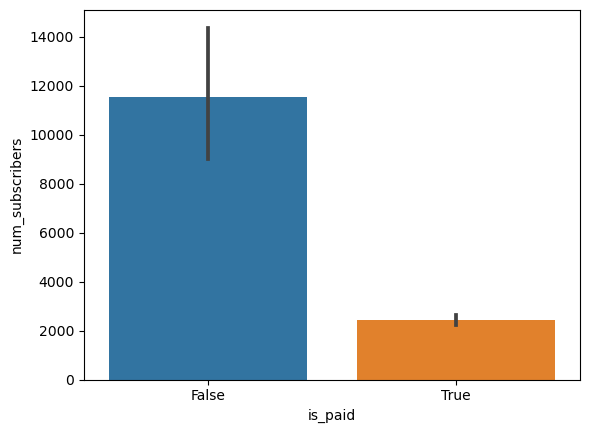

In [59]:
sns.barplot(x = 'is_paid',y = 'num_subscribers',data  = df)

# Which Level Has The Highest Number of Subscribers?

In [61]:
df.groupby('level')['num_subscribers'].mean()

level
All Levels            3569.761558
Beginner Level        3195.459779
Expert Level           865.448276
Intermediate Level    1762.482185
Name: num_subscribers, dtype: float64

<Axes: xlabel='level', ylabel='num_subscribers'>

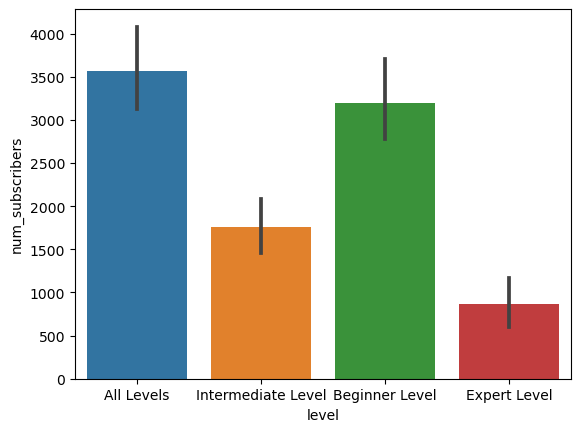

In [62]:
sns.barplot(x = 'level',y = 'num_subscribers',data = df)

# Find Most Popular Course Title

In [66]:
df[df['num_subscribers'] == df['num_subscribers'].max()]['course_title']

2827    Learn HTML5 Programming From Scratch
Name: course_title, dtype: object

# Display 10 Most Popular Courses As Per Number of Subscribers

In [75]:
index = df['num_subscribers'].sort_values(ascending = False).head(10).index
df.loc[index]['course_title']

2827                 Learn HTML5 Programming From Scratch
3032                       Coding for Entrepreneurs Basic
3230                           The Web Developer Bootcamp
2783    Build Your First Website in 1 Week with HTML5 ...
3232                The Complete Web Developer Course 2.0
1896                Free Beginner Electric Guitar Lessons
2589    Web Design for Web Developers: Build Beautiful...
2619               Learn Javascript & JQuery From Scratch
3289    Practical PHP: Master the Basics and Code Dyna...
3247            JavaScript: Understanding the Weird Parts
Name: course_title, dtype: object

# Find The Course Which Is Having The Highest Number of Reviews.

In [12]:
a = df['num_reviews'].max()
df[df['num_reviews'] == a]['subject']

3230    Web Development
Name: subject, dtype: object

<Axes: xlabel='subject', ylabel='num_reviews'>

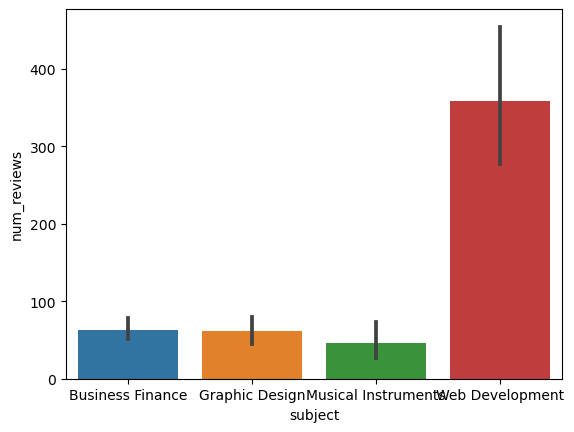

In [14]:
sns.barplot(x = 'subject',y = 'num_reviews',data = df)

#  Does Price Affect the Number of Reviews?

<Axes: xlabel='price', ylabel='num_reviews'>

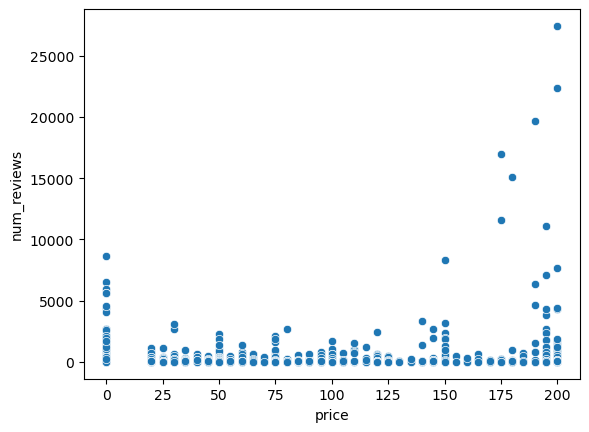

In [17]:
sns.scatterplot(x = 'price',y = 'num_reviews',data = df)

# Find Total Number of Courses Related To Python

In [26]:
len(df[df['course_title'].str.contains('python',case = False)])

29

# Display 10 Most Popular Python Courses As Per Number of Subscribers

<Axes: xlabel='num_subscribers', ylabel='course_title'>

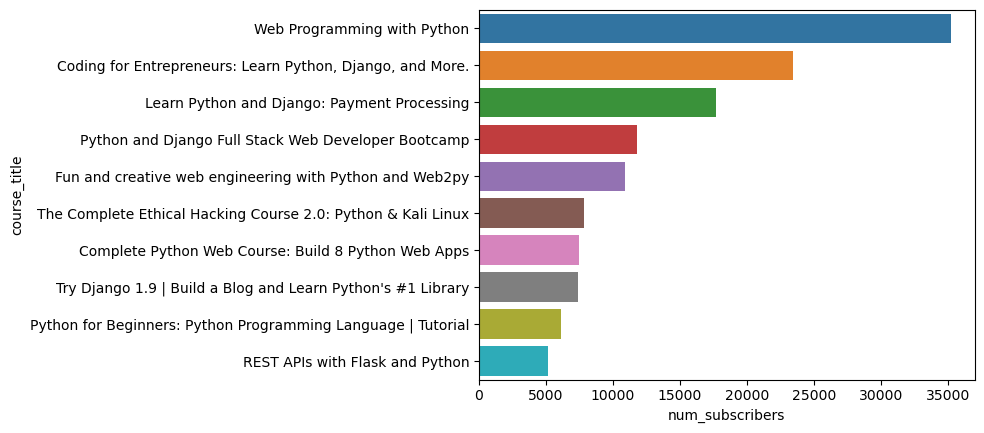

In [36]:
py = df[df['course_title'].str.contains('python',case = False)].sort_values(by = ['num_subscribers'],ascending = False).head(10)
sns.barplot(y = 'course_title',x = 'num_subscribers',data = py)

# In Which Year The Highest Number of Courses Were Posted?

In [39]:
a = df['published_timestamp'].dt.year
a.value_counts().head(1)

2016    1206
Name: published_timestamp, dtype: int64

# Display Category-Wise Count of Posted Subjects [Year Wise] 

In [48]:
df['year'] = df['published_timestamp'].dt.year

In [55]:
df.groupby('year')['subject'].value_counts()

year  subject            
2011  Web Development          5
2012  Web Development         19
      Graphic Design          10
      Musical Instruments     10
      Business Finance         6
2013  Business Finance        84
      Web Development         56
      Musical Instruments     39
      Graphic Design          23
2014  Business Finance       192
      Musical Instruments    120
      Web Development        113
      Graphic Design          66
2015  Business Finance       339
      Web Development        336
      Musical Instruments    171
      Graphic Design         168
2016  Web Development        448
      Business Finance       349
      Musical Instruments    228
      Graphic Design         181
2017  Business Finance       225
      Web Development        223
      Graphic Design         155
      Musical Instruments    112
Name: subject, dtype: int64